<a href="https://colab.research.google.com/github/dpant/TensorFlow/blob/main/Course2/KaggleSignDetectionMultiClassClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [4]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files
from os import path, getcwd, chdir


The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

Sign up and download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv -- You will upload both of them using this button before you can continue.


In [2]:
!git clone https://github.com/dpant/TensorFlow.git

Cloning into 'TensorFlow'...
remote: Enumerating objects: 281, done.
remote: Counting objects: 100% (281/281), done.
remote: Compressing objects: 100% (277/277), done.
remote: Total 281 (delta 143), reused 5 (delta 1), pack-reused 0
Receiving objects: 100% (281/281), 48.29 MiB | 18.89 MiB/s, done.
Resolving deltas: 100% (143/143), done.


In [5]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
        reader = csv.reader(training_file, delimiter=',')    
        imgs = []
        labels = []
        next(reader, None)
        for row in reader:
            label = row[0]
            data = row[1:]
            img = np.array(data).reshape((28, 28))

            imgs.append(img)
            labels.append(label)

        images = np.array(imgs).astype(float)
        labels = np.array(labels).astype(float)
    return images, labels

path_sign_mnist_train = f"{getcwd()}/TensorFlow/datasets/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/TensorFlow/datasets/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [6]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
     rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

validation_datagen = ImageDataGenerator(
     rescale=1. / 255,
)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [7]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

# Compile Model. 
model.compile(  optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

train_gen = train_datagen.flow(
    training_images,
    training_labels,
    batch_size=64
)

val_gen = validation_datagen.flow(
    testing_images,
    testing_labels,
    batch_size=64
)

# Train the Model
history = model.fit_generator(
    train_gen,
    epochs=20,
    validation_data=val_gen
)

model.evaluate(testing_images, testing_labels, verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
429/429 [==============================] - 41s 95ms/step - loss: 2.7476 - accuracy: 0.1670 - val_loss: 1.9396 - val_accuracy: 0.3370
Epoch 2/20
429/429 [==============================] - 41s 95ms/step - loss: 2.0371 - accuracy: 0.3568 - val_loss: 1.4211 - val_accuracy: 0.5004
Epoch 3/20
429/429 [==============================] - 41s 96ms/step - loss: 1.6354 - accuracy: 0.4754 - val_loss: 0.9044 - val_accuracy: 0.7196
Epoch 4/20
429/429 [==============================] - 42s 97ms/step - loss: 1.3655 - accuracy: 0.5576 - val_loss: 0.7741 - val_accuracy: 0.7359
Epoch 5/20
429/429 [==============================] - 42s 97ms/step - loss: 1.1927 - accuracy: 0.6140 - val_loss: 0.6577 - val_accuracy: 0.7829
Epoch 6/20
429/429 [==============================] - 41s 96ms/step - loss: 1.0444 - accuracy: 0.6596 - val_loss: 0.6313 - val_accuracy: 0.7761
Epoch 7/20
429/429 [==============================] - 41s 97ms/step - loss: 0.9247 - accuracy: 0.6948 - val_loss: 0.5694 - val_accuracy:

[146.0435028076172, 0.7211377620697021]

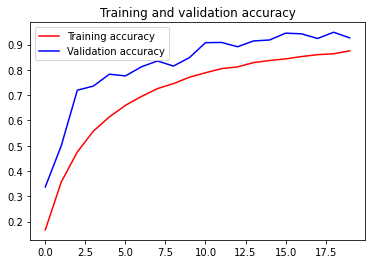

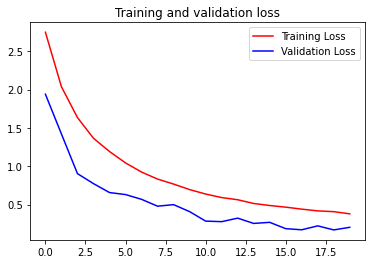

In [10]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()